# Second version

In [1]:
import feature_selection_RL_V2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#Data processing

datContent = [i.strip().split() for i in open("australian_data.dat").readlines()]
import csv
# write it as a new CSV file
with open("australian_data.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)

australian_data = pd.read_csv('australian_data.csv', sep=',', header=None)
australian_data.rename(columns={14: 'label'}, inplace=True)
X = australian_data.drop('label', axis=1)
y = australian_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [3]:
#Simulation
feature_number: int = 14

print('---------- AOR init ----------')
aor: list = [np.zeros(feature_number), np.zeros(feature_number)]
print(aor)

print('---------- Process init ----------')
feature_selection_process = feature_selection_RL_V2.FeatureSelectionProcessV2(feature_number, .05, .5, .99, aor, {})
print(feature_selection_process)

print('---------- The process has been successfully init ----------')

---------- AOR init ----------
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]
---------- Process init ----------
FeatureSelectionProcessV2(nb_of_features=14, eps=0.05, alpha=0.5, gamma=0.99, aor=[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])], feature_structure={})
---------- The process has been successfully init ----------


In [14]:
nb_iter: int = 100
nb_explored: list = []
nb_not_explored: list = []
explored: int = 0
not_explored: int = 0

In [15]:
for it in range(nb_iter):

    print(f'Current state selection {it} ---------')
    current_state = feature_selection_process.start_from_empty_set()
    
    while current_state.number[0] <= 13:

        #We get the reward of the state
        if current_state.reward == 0:
            current_state.get_reward(X_train, y_train, X_test, y_test)

        #We chose the next state
        return_next_action_state = current_state.select_action(feature_selection_process.feature_structure, feature_selection_process.eps, feature_selection_process.aor)
        next_state, next_action = return_next_action_state[1], return_next_action_state[0]

        current_state.nb_visited += 1

        if current_state.v_value == 0:
            explored += 1
            print(explored)
        else:
            not_explored += 1

        if len(next_action.state_next.description) >= 14:
            break

        #We update the v_value of the state
        current_state.update_v_value(feature_selection_process.alpha, feature_selection_process.gamma, next_state.v_value)

        #We update the aor table
        feature_selection_process.aor = next_action.get_aorf(feature_selection_process.aor)

        #Add the state to the research tree
        feature_selection_process.add_to_historic(current_state)

        current_state = next_state
        
    nb_explored.append(explored)
    nb_not_explored.append(not_explored)

results = feature_selection_process.get_final_aor_sorted()

Current state selection 0 ---------
Current state selection 1 ---------
1
2
3
4
5
6
7
8
9
10
11
Current state selection 2 ---------
Current state selection 3 ---------
Current state selection 4 ---------
Current state selection 5 ---------
12
13
14
15
16
17
18
Current state selection 6 ---------
Current state selection 7 ---------
19
20
21
22
Current state selection 8 ---------
Current state selection 9 ---------
23
24
Current state selection 10 ---------
25
26
Current state selection 11 ---------
27
Current state selection 12 ---------
Current state selection 13 ---------
Current state selection 14 ---------
28
29
30
31
Current state selection 15 ---------
Current state selection 16 ---------
Current state selection 17 ---------
32
33
34
35
36
37
38
39
40
Current state selection 18 ---------
41
42
43
44
45
46
47
48
49
Current state selection 19 ---------
Current state selection 20 ---------
50
51
52
53
54
55
56
57
58
59
Current state selection 21 ---------
60
61
62
63
64
65
66
67
Curr

In [16]:
feature_selection_process.feature_structure

{0: [State(number=[0, 0], description=[], v_value=7.7112757738602, reward=0.8508771929824561, nb_visited=220)],
 1: [State(number=[1, 0], description=[7], v_value=7.776999546526406, reward=0.8640350877192983, nb_visited=216),
  State(number=[1, 1], description=[0], v_value=0.43640350877192985, reward=0.8728070175438597, nb_visited=2),
  State(number=[1, 1], description=[10], v_value=0.4298245614035088, reward=0.8596491228070176, nb_visited=2)],
 2: [State(number=[2, 0], description=[7, 8], v_value=7.496283676300813, reward=0.8771929824561403, nb_visited=206),
  State(number=[2, 1], description=[0, 6], v_value=0.4298245614035088, reward=0.8596491228070176, nb_visited=2),
  State(number=[2, 2], description=[3, 7], v_value=0.4276315789473684, reward=0.8552631578947368, nb_visited=2),
  State(number=[2, 2], description=[3, 10], v_value=0.43201754385964913, reward=0.8640350877192983, nb_visited=2),
  State(number=[2, 3], description=[7, 11], v_value=0.4342105263157895, reward=0.868421052631

In [17]:
feature_selection_process.get_optimal_state_value()

State(number=[1, 0], description=[7], v_value=7.776999546526406, reward=0.8640350877192983, nb_visited=216)

In [18]:
feature_selection_process.aor

[array([ 36., 109., 106., 108., 106., 105.,  31., 110., 110., 107., 110.,
        103., 100., 109.]),
 array([0.43663893, 2.66670641, 2.00219444, 2.33847864, 1.24475736,
        1.77713158, 0.30596018, 3.96150915, 3.50456141, 1.44464101,
        3.30529935, 1.02404737, 0.72530433, 2.94515265])]

In [19]:
results

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13),
 array([ 36., 109., 106., 108., 106., 105.,  31., 110., 110., 107., 110.,
        103., 100., 109.]),
 (0.43663892635262624,
  2.666706413400444,
  2.002194439109491,
  2.338478638287648,
  1.24475735836526,
  1.7771315847259546,
  0.30596018217780957,
  3.9615091547766723,
  3.5045614127768334,
  1.4446410099419058,
  3.3052993538989397,
  1.024047372709737,
  0.7253043327284493,
  2.9451526510037174),
 array([ 6,  0, 12, 11,  4,  9,  5,  2,  3,  1, 13, 10,  8,  7])]

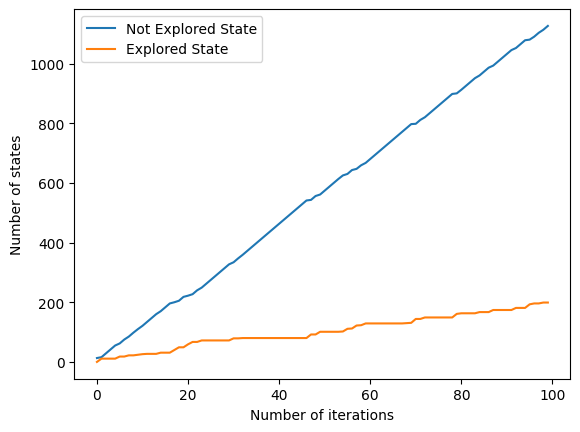

In [20]:
plt.plot([i for i in range(len(nb_not_explored))], nb_not_explored, label='Not Explored State')
plt.plot([i for i in range(len(nb_explored))], nb_explored, label='Explored State')
plt.xlabel('Number of iterations')
plt.ylabel('Number of states')
plt.legend(loc="upper left")

In [43]:
#Five first  [ 0,  5,  1, 13,  9, 12,  7,  6,  8,  3,  2, 10,  4, 11] --> 0.828

#Four randomly picked first  [13, 11,  0,  3, 10,  7,  2,  6,  8,  9,  4, 12,  5,  1] --> 0.671
#Four initial state picked first [ 3, 11,  5, 13,  6,  8,  0,  4,  9,  2, 10, 12,  1,  7] --> 0.846
#Four initial state picked first [ 1,  9,  2,  8,  4,  3, 10,  5, 11,  7, 13,  0, 12,  6] --> 0.776
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4)
clf.fit(X_train[[8,  7]], y_train)
accuracy: float = clf.score(X_test[[8,  7]], y_test)

In [44]:
accuracy

0.8464912280701754

In [45]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = RandomForestClassifier(max_depth=2)
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X_train, y_train)

In [46]:
selector.score(X_test, y_test)

0.8464912280701754